# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1095.
Date:                Fri, 05 May 2023   Prob (F-statistic):           9.24e-43
Time:                        13:46:30   Log-Likelihood:                 5.5153
No. Observations:                  50   AIC:                            -3.031
Df Residuals:                      46   BIC:                             4.618
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1190      0.077     66.476      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.62445026  5.0791561   5.49853785  5.85858285  6.14394448  6.35046358
  6.48585175  6.56842443  6.62409164  6.68210109  6.77023286  6.91023518
  7.1142513   7.38282436  7.70480816  8.05919845  8.41858387  8.75364956
  9.03799351  9.25246431  9.38830773  9.44860496  9.44776639  9.40916405
  9.36129162  9.33308304  9.34915868  9.42578035  9.5681795   9.76969769
 10.0128806  10.27234567 10.51895244 10.7245902  10.86679651 10.93244774
 10.91991521 10.8393328  10.71093198 10.56171783 10.42103219 10.31573286
 10.26578097 10.28096139 10.35927514 10.48726778 10.64223995 10.79597683
 10.91938372 10.98726625]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.97049523 10.83630035 10.60196055 10.3068523  10.00280887  9.74142978
  9.5614474   9.47924392  9.48484044  9.54434013]


## Plot comparison

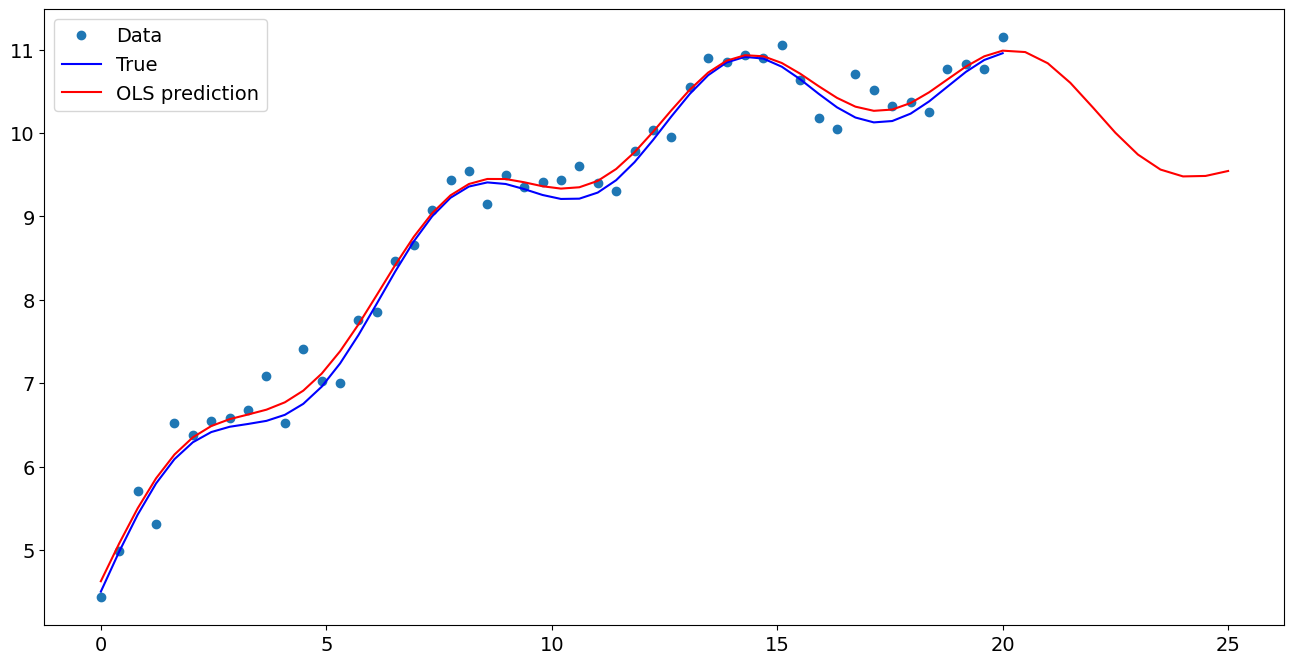

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.118951
x1                  0.495829
np.sin(x1)          0.440606
I((x1 - 5) ** 2)   -0.019780
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.970495
1    10.836300
2    10.601961
3    10.306852
4    10.002809
5     9.741430
6     9.561447
7     9.479244
8     9.484840
9     9.544340
dtype: float64